# Laboratorul 7

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Exercițiul 1

Realizați graficele din figurile 1 și 2 din îndrumar pentru un semnal sinusoidal cu o frecvență aleasă de voi, _alta_ decât cea utilizată aici.

Reamintim că graficul din dreapta din figura 1 reprezintă înfășurarea semnalului pe cercul unitate, anume reprezentarea în planul complex a șirului $y[n] = x[n] \cdot e^{-2 \pi i n}$.

De asemenea, figura 2 arată influența diferitelor frecvențe de înfășurare asupra formei pe care o are această reprezentare. \
Afișați grafic $z_{\omega} [n] = x[n] \cdot e^{-2 \pi i \omega n}$, pentru **patru valori diferite** ale $\omega$, dintre care una egală cu frecvența semnalului.

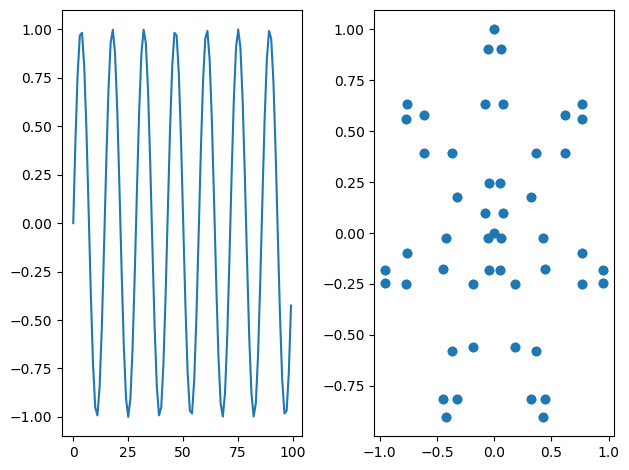

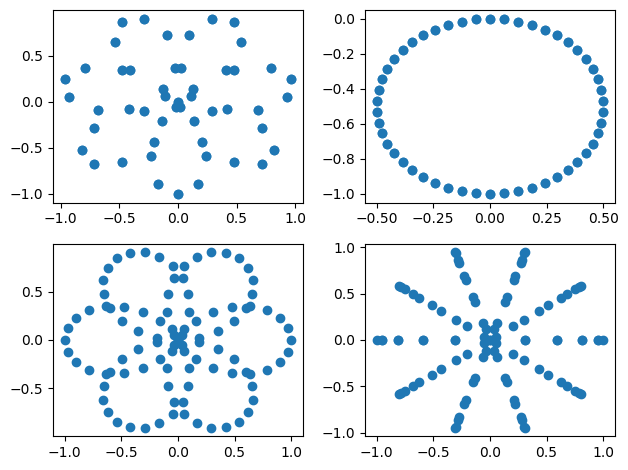

In [4]:
import math
import matplotlib.pyplot as plt

fs = 100
T = 1.0
N = int(fs * T)
f_semnal = 7

t = [n / fs for n in range(N)]
x = [math.sin(2 * math.pi * f_semnal * tn) for tn in t]

y_real = []
y_imag = []
for n in range(N):
    unghi = -2 * math.pi * n / N
    exp_re = math.cos(unghi)
    exp_im = math.sin(unghi)
    y_real.append(x[n] * exp_re)
    y_imag.append(x[n] * exp_im)

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(range(N), x)

plt.subplot(1, 2, 2)
plt.scatter(y_real, y_imag)

plt.tight_layout()
plt.show()

omegas = [3, 7, 12, 20]

plt.figure()
for i, w in enumerate(omegas):
    z_real = []
    z_imag = []
    for n in range(N):
        angle = -2 * math.pi * w * n / fs
        exp_re = math.cos(angle)
        exp_im = math.sin(angle)
        z_real.append(x[n] * exp_re)
        z_imag.append(x[n] * exp_im)

    plt.subplot(2, 2, i + 1)
    plt.scatter(z_real, z_imag)

plt.tight_layout()
plt.show()


## Exercițiul 2

Afișați **modulul** (valoarea absolută) a transformatei Fourier (folosind relația 1 din PDF) pentru un semnal compus de voi, având **cel puțin trei componente de frecvență distincte** (obțineți un grafic asemănător figurii 3).

Ajustați frecvențele de înfășurare $\omega$ utilizate în transformata Fourier în funcție de frecvența caracteristică a sinusoidei.

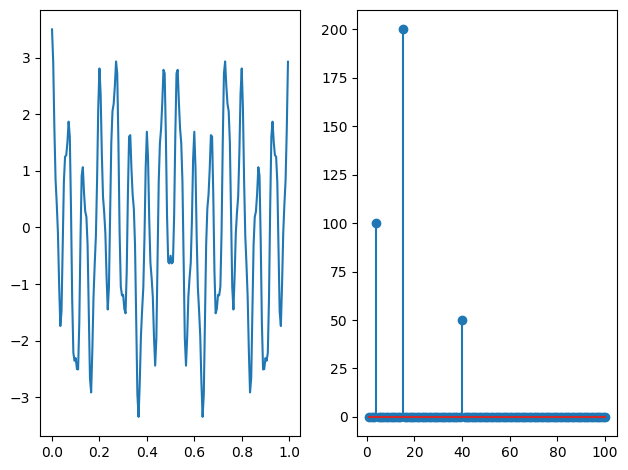

In [5]:
import math
import matplotlib.pyplot as plt

fs = 200
T = 1.0
N = int(fs * T)

f1, A1 = 4, 1.0
f2, A2 = 15, 2.0
f3, A3 = 40, 0.5

t = [n / fs for n in range(N)]
x = []
for n in range(N):
    xn = (A1 * math.cos(2 * math.pi * f1 * n / fs) +
          A2 * math.cos(2 * math.pi * f2 * n / fs) +
          A3 * math.cos(2 * math.pi * f3 * n / fs))
    x.append(xn)

freqs = list(range(1, 101))
X_abs = []

for f in freqs:
    re_sum = 0.0
    im_sum = 0.0
    for n, xn in enumerate(x):
        angle = -2 * math.pi * f * n / fs
        re_sum += xn * math.cos(angle)
        im_sum += xn * math.sin(angle)
    magnitude = math.sqrt(re_sum**2 + im_sum**2)
    X_abs.append(magnitude)

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(t, x)

plt.subplot(1, 2, 2)
plt.stem(freqs, X_abs)

plt.tight_layout()
plt.show()
